# The Titanic - Did Anyone Get Lucky?
## The data's untold stories from the disaster.

## Note: this is attached to my article and may not make much sense without its context:
https://medium.com/@autonopy/the-titanic-did-anyone-get-lucky-6acd89788f15

## First, I will import the training dataset and get some preliminary stats on it

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

I like subplots, so I created a function to quickly create them by passing in a tuple.

In [2]:
import matplotlib.pyplot as plt

def custom_subplots(df,plots,height=6,fs=12):
    figures = len(plots)
    rows = int((figures+1)/2)
    ax = [0]*figures
    fig = plt.figure(figsize=(14,height*rows))
    plt.rcParams.update({'font.size': fs})

    for idx in range(0,figures):
        ax[idx] = fig.add_subplot(rows,2,idx+1)
        info = plots[idx] #get subplot tuple
        if info[0] == 'scatter':
            df.plot(kind=info[0],x=info[1],y=info[2], fontsize=fs, ax=ax[idx], ylim=info[3])
        elif info[0] == 'bar':
            df[info[1]].value_counts().plot(kind=info[0], fontsize=fs, ax=ax[idx])
            ax[idx].set_title(info[1])
            ax[idx].set_xticklabels(ax[idx].get_xticklabels(),rotation=0)
        elif info[0] == 'box':
            df[info[1]].plot(kind=info[0], fontsize=fs, ax=ax[idx])
        elif info[0] == 'hist':
            df[info[1]].plot(kind=info[0], fontsize=fs, ax=ax[idx])
            ax[idx].set_title(info[1])
        
        for p in ax[idx].patches:
            ax[idx].annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 0.9), color='black')
    fig.subplots_adjust(hspace=0.35)
    plt.show()

#### Dataframes:  
df_all - all columns (none dropped) but new, processed columns added  
df_train - a pointer df, for training, extracted columns to be used in the training; may have one-off data processing applied 
df_ds - a custom dataframe with info about the provided data features

In [3]:
df_all = pd.read_csv('train.csv')
df_all.head(10) #lets take a peek...

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_all.describe(include='all') #how many datapoints are there, and what can basic stats tell us

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ling, Mr. Lee",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df_all.columns = [a.lower() for a in df_all.columns.tolist()] #change all columns to lowercase for easier use
df_all.columns

Index(['passengerid', 'survived', 'pclass', 'name', 'sex', 'age', 'sibsp',
       'parch', 'ticket', 'fare', 'cabin', 'embarked'],
      dtype='object')

### After considering the names column, I decided that the most useful data in it was the person's title, so I extract it here.

In [6]:
def find_title(b):
    return [a[:-1] for a in b if a[-1]=='.'][0]

titles = [find_title(a.split()) for a in df_all.name.tolist()]

df_all['title'] = titles
df_all.head(8)

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


In [7]:
#I like to build my own "describe" dataframe called "df_ds" (data summary) with info that helps me when cleaning data

df_ds = pd.DataFrame(df_all.dtypes,columns=['data types']) #first get the data types for each column
df_ds['null count'] = df_all.isnull().sum() #how many missing values do we have?

newcol = 'unique non-null values' #set column name
df_ds[newcol] = 0 #initialize with empty values

#for our predictor column, get a count of each outcome
counts = df_all['survived'].value_counts().tolist() #how many people died (0) and how many survived (1)?
df_ds.loc['survived',newcol] = '{} died, {} survived'.format(counts[0],counts[1])

#for these columns, show a list of the unique values
for col in ['title','pclass','sex','sibsp','parch','embarked']: 
    df_ds.loc[col,newcol] = 'Values: {}'.format(str(sorted(df_all[df_all[col].notnull()][col].unique().tolist())))

#for these columns, show the range of values
for col in ['passengerid','age','fare']:
    df_ds.loc[col,newcol] = "Range: {} to {}".format(df_all[col].min(),df_all[col].max())

#for these columns, show the count of unique non-null values
for col in ['ticket','cabin']:
    df_ds.loc[col,newcol] = 'Count: {}'.format(len(df_all[df_all[col].notnull()][col].unique().tolist()))

pd.set_option('display.max_colwidth', 160)
df_ds

,data types,null count,unique non-null values
passengerid,int64,0,Range: 1 to 891
survived,int64,0,"549 died, 342 survived"
pclass,int64,0,"Values: [1, 2, 3]"
name,object,0,0
sex,object,0,"Values: ['female', 'male']"
age,float64,177,Range: 0.42 to 80.0
sibsp,int64,0,"Values: [0, 1, 2, 3, 4, 5, 8]"
parch,int64,0,"Values: [0, 1, 2, 3, 4, 5, 6]"
ticket,object,0,Count: 681
fare,float64,0,Range: 0.0 to 512.3292


In [8]:
#to simplify the data, it would be easier to use the passenger ID as the index
df_all.set_index('passengerid', inplace=True)

#I will also extract the survival results now and send them to the y-variable for later
y = df_all['survived'].values

In [9]:
#added so I can see the results of every column instead of getting the "..." in the middle
pd.options.display.max_columns = None

### Thoughts from seeing the data for the first time:
1. There are many straightforward columns like age and fare that can be used for analysis
2. Some columns seem like they would be irrelevant, like name, but I wondered if there are hidden clues in their name like "Miss" and "Master" that could contain useful information. So, I extracted the titles.
3. There are a lot of missing datapoints in the age and cabin columns
4. The ratio of survivors to those who died is sufficiently balanced so as to not be skewed

__The Kaggle competition instructions also provided some valuable info about the data:__  
pclass: A proxy for socio-economic status (SES)  
1st = Upper, 2nd = Middle, 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

Port of Embarkation:	C = Cherbourg, Q = Queenstown, S = Southampton

### Some additional cleaning:

Note: I attempted to predict age using multiple linear regression before resorting to using the median, as age is a high-value predictor of survival. However, the best I could get was 18% for an R^2 value, so it didn't prove to be of much value. It was better when the survival feature was included (~25-30%) but I don't have that for the test data, so it didn't make sense to use it for training.

In [10]:
#I can drop columns with high counts of missing values
#'ticket' and 'cabin' will not be used as there are too many missing values / too many unique values

#I can fill others with most popular / mean data
#the 'age' and 'embarked' columns have missing values
#'embarked' can easily be filled by the most popular port embarked from (2 rows)
#'age' can be filled with the mean, median, or mode (177 rows)
#df_all['embarked'].fillna(df_all['embarked'].value_counts().index[0], inplace=True)
#df_all['age'].fillna(df_all['age'].median(), inplace=True)
#instead of using the above, I'm going to try the SimpleImputer from sklearn

from sklearn.impute import SimpleImputer

to_fix = [('embarked','most_frequent'), ('age','median')]

for fixing in to_fix :
    col, strat = fixing
    imr = SimpleImputer(missing_values=np.nan, strategy=strat)
    imr = imr.fit(df_all[[col]])
    df_all[col] = imr.transform(df_all[[col]]).ravel()

In [11]:
print(df_all.isnull().sum())

survived      0
pclass        0
name          0
sex           0
age           0
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      0
title         0
dtype: int64


## Next, I'll do some simple data visualization for the columns that afford it

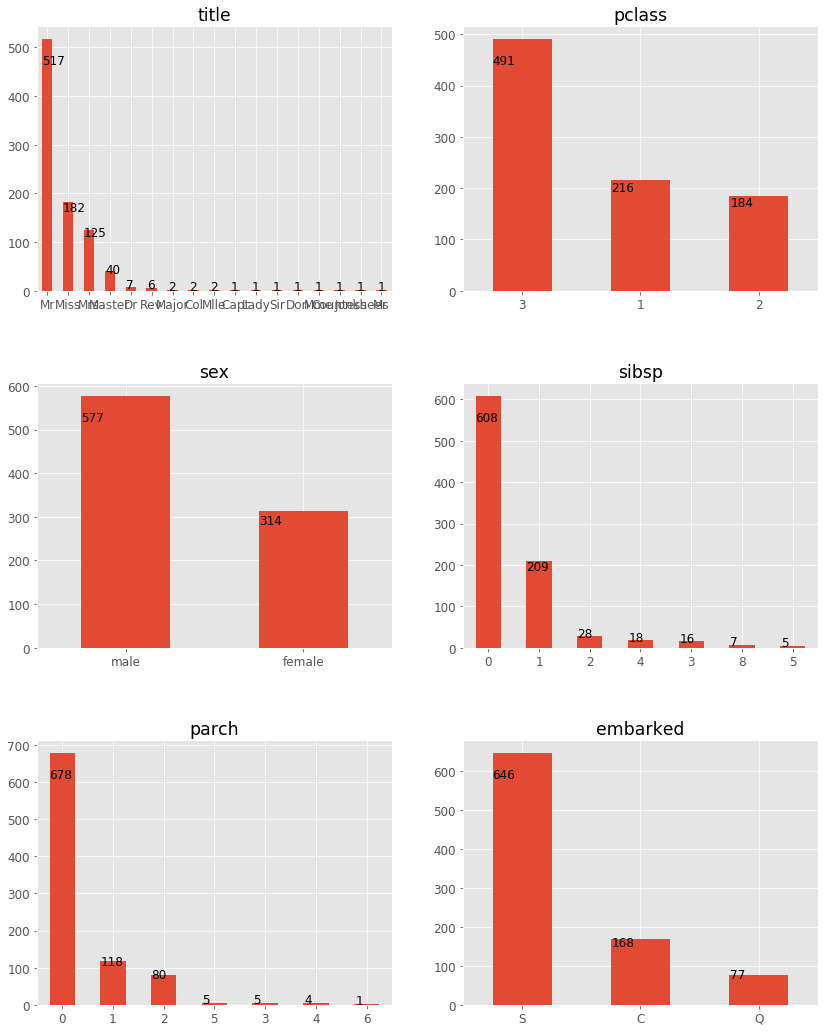

In [12]:
cols = [('bar','title'),('bar','pclass'),('bar','sex'),('bar','sibsp'),('bar','parch'),('bar','embarked')]
custom_subplots(df_all,cols)

Interesting. Now I'd like to see what happens when I split them by who survived and who perished. My custom_subplots function isn't set up for this yet, so I'll do it manually here:

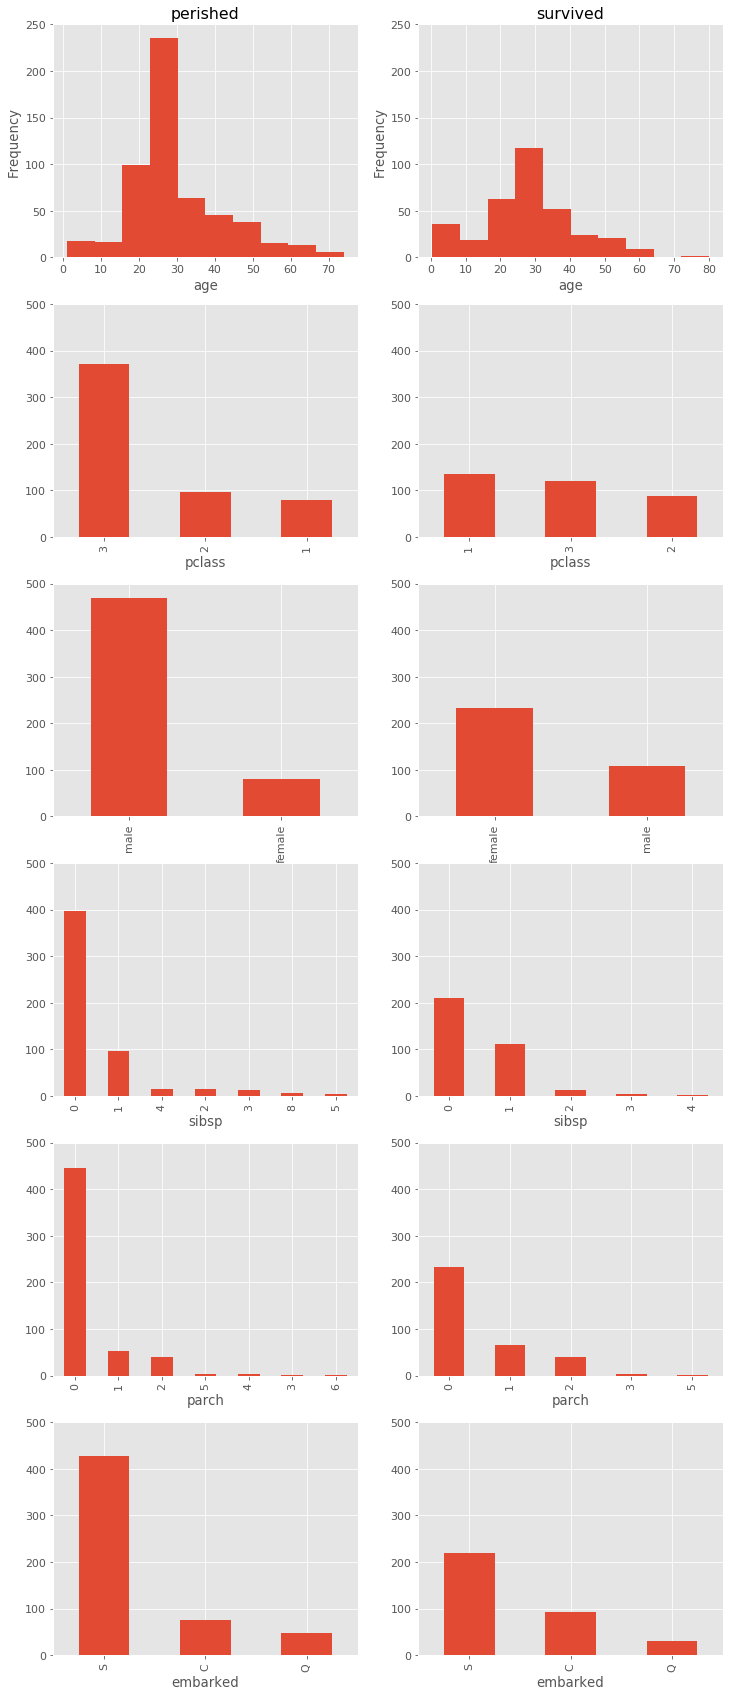

In [13]:
cols = ['age','pclass','sex','sibsp','parch','embarked']
rows = len(cols)
fig = plt.figure(figsize=(12,30))
plt.rcParams.update({'font.size': 11})
ax = [fig.add_subplot(rows,2,a+1) for a in range(rows+rows)]
for idx in range(0,rows+rows,2):
    col = cols[int(idx/2)]
    if col == 'age':
        df_all[df_all['survived']==0][col].plot(kind='hist',ax=ax[idx],ylim=(0,250))
        df_all[df_all['survived']==1][col].plot(kind='hist',ax=ax[idx+1],ylim=(0,250))
    else:
        df_all[df_all['survived']==0][col].value_counts().plot(kind='bar',ax=ax[idx],ylim=(0,500))
        df_all[df_all['survived']==1][col].value_counts().plot(kind='bar',ax=ax[idx+1],ylim=(0,500))
    ax[idx].set_xlabel(col)
    ax[idx+1].set_xlabel(col)
ax[0].set_title('perished')
ax[1].set_title('survived')
plt.show()

## Normalization, Encoding, and Training/Test Split

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer

Pclass, sex, embarked, and title should all be one-hot encoded

In [15]:
df_all[['pclass_obj']] = df_all[['pclass']].astype("object") #convert pclass to object so that it generates dummies
categoricals = ['pclass_obj', 'sex', 'embarked', 'title']
df_ohe = df_all[categoricals]
df_ohe = pd.get_dummies(df_ohe)
df_all = pd.concat([df_all,df_ohe],axis=1)
df_all.head(10)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,pclass_obj,pclass_obj_1,pclass_obj_2,pclass_obj_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Capt,title_Col,title_Countess,title_Don,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir
passengerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,Mr,3,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
# NOTE: May have to change to minmax because Naive Bayes Multinomal can't run on negative data
vars_to_scale = ['age','fare','sibsp','parch']
scale_type = 0 #0=Standard, 1=MinMax
for var in vars_to_scale :
    if scale_type:
        df_all[var+'_norm'] = MinMaxScaler().fit(df_all[[var]]).transform(df_all[[var]])
    else:
        df_all[var+'_norm'] = StandardScaler().fit(df_all[[var]]).transform(df_all[[var]])
        
df_all.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,pclass_obj,pclass_obj_1,pclass_obj_2,pclass_obj_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Capt,title_Col,title_Countess,title_Don,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,age_norm,fare_norm,sibsp_norm,parch_norm
passengerid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.565736,-0.502445,0.432793,-0.473674
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.663861,0.786845,0.432793,-0.473674
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.258337,-0.488854,-0.474545,-0.473674
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.433312,0.420730,0.432793,-0.473674
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.433312,-0.486337,-0.474545,-0.473674


In [17]:
df_all.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'title', 'pclass_obj', 'pclass_obj_1',
       'pclass_obj_2', 'pclass_obj_3', 'sex_female', 'sex_male', 'embarked_C',
       'embarked_Q', 'embarked_S', 'title_Capt', 'title_Col', 'title_Countess',
       'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady', 'title_Major',
       'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr',
       'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir', 'age_norm',
       'fare_norm', 'sibsp_norm', 'parch_norm'],
      dtype='object')

In [18]:
originals = ['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'title', 'pclass_obj']

df_train = df_all.drop(originals, axis=1) #dropped only original columns

X = df_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) #None=randomized

---
# IMPORTANT NOTE: 
## The train-test split above is established but I didn't use it for many parts of this project. For the experimentation done here, I wanted to use the entire training dataset provided by Kaggle and implement sklearn's CV methods to cross validate. That way, my choice of train-test splitting didn't skew results, AND I could analyze all of the passengers in the training dataset. This is NOT standard practice when doing data science, so it is important to note why I did it here!  Thanks.
---

## Modeling
KNN, Naive Bayes, Decision Trees, Random Forests, SVM, and Logistic Regression

In [19]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, jaccard_score, accuracy_score, log_loss
from sklearn.model_selection import GridSearchCV

The "models" dictionary contains all of the models I used and was created to make it easy to access each of them AND their abbreviation, especially in loops. 

In [20]:
KNN = KNeighborsClassifier(n_neighbors = 5)
NB = BernoulliNB(alpha=1.0) #originally was NB = MultinomialNB(alpha=1.0)
DT = DecisionTreeClassifier(criterion='gini', max_depth = 8) #was 'entropy'
RF = RandomForestClassifier(n_estimators=100, max_depth = 8, bootstrap = True, max_features = 'sqrt', criterion='gini')
SVM = SVC(C=0.5, kernel='linear', gamma='auto', probability=True) #linear, poly, rbf, sigmoid
LR = LogisticRegression(C=0.5, solver='liblinear') #'liblinear','newton-cg', 'sag', 'saga', and 'lbfgs'

models = {'KNN':KNN, 'NB':NB, 'DT':DT, 'RF':RF, 'SVM':SVM, 'LR':LR}

In [21]:
#I want to check out all metrics to start, to be sure I'm not getting poor recall, precision, etc.
for name,model in models.items():
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       111
           1       0.82      0.78      0.80        68

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       111
           1       0.78      0.72      0.75        68

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       111
           1       0.81      0.68      0.74        68

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179

              preci

All of the models seem to have good precision and recall, so I'm going to focus on accuracy only from here on. I think a cross-validation would be good to see how the models are performing more reliably, and I'll set this as the baseline to compare to when testing effectiveness of changes to the data.

In [22]:
def model_test(models,X,y):
    model_results = {}
    for name,model in models.items():
        scores = cross_val_score(model, X, y, cv=4)*100 
        model_results[name] = "{:.1f}%".format(scores.mean())
    return model_results

def model_test_against_baseline(models,X,y):
    model_results = {}
    for name,model in models.items():
        scores = cross_val_score(model, X, y, cv=4)*100 
        model_results[name] = "{:.1f}%".format(scores.mean() - float(model_results_baseline[name][:4]))
    return model_results

I want a baseline accuracy score for each model so I can see how changes to model hyperparameters and features impacts the accuracy.

In [23]:
model_results_baseline = model_test(models,X,y)
model_results_baseline

{'KNN': '81.0%',
 'NB': '78.9%',
 'DT': '79.3%',
 'RF': '82.5%',
 'SVM': '82.4%',
 'LR': '81.8%'}

In [24]:
if scale_type: #if scaled MinMax, it's ok to run these; otherwise, they will throw a traceback
    NBs = {'Gaussian':GaussianNB(), 'Multinomial':MultinomialNB(), 'Complement':ComplementNB(), 'Bernoulli':BernoulliNB()}
    model_test(NBs,X,y)

WHOA! Incredible results on the first try!  I see why this is an introductory project, now.  I haven't tuned hyperparameters yet!

### Now I'll try some manual feature exploration

In [25]:
#what if I only trained with one feature at a time?
df_colresults = pd.DataFrame()
for col in list(df_train.columns):
    X = df_train[[col]]
    df_colresults[col] = model_test(models,X,y).values()
    
df_colresults['models'] = models.keys()
df_colresults.set_index('models', inplace=True)
df_colresults

,pclass_obj_1,pclass_obj_2,pclass_obj_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Capt,title_Col,title_Countess,title_Don,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,age_norm,fare_norm,sibsp_norm,parch_norm
models,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KNN,68.1%,60.5%,57.1%,78.7%,74.2%,62.7%,57.1%,62.2%,61.6%,61.6%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,62.1%,69.7%,61.6%,61.6%,74.5%,69.8%,61.6%,44.8%,61.6%,59.3%,66.7%,62.7%,62.5%
NB,67.9%,60.4%,66.8%,78.7%,78.7%,63.6%,61.6%,61.1%,61.6%,61.5%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,62.3%,69.7%,61.8%,61.6%,78.2%,69.8%,61.6%,61.6%,61.6%,61.6%,66.2%,61.6%,60.4%
DT,67.9%,60.4%,66.8%,78.7%,78.7%,63.6%,61.6%,61.1%,61.6%,61.5%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,62.3%,69.7%,61.8%,61.6%,78.2%,69.8%,61.6%,61.6%,61.6%,62.1%,65.8%,62.7%,62.2%
RF,67.9%,61.6%,66.8%,78.7%,78.7%,63.6%,61.6%,61.1%,61.6%,61.5%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,62.3%,69.7%,61.8%,61.6%,78.2%,69.8%,61.6%,61.6%,61.6%,60.9%,69.8%,62.7%,62.3%
SVM,67.9%,61.6%,66.8%,78.7%,78.7%,63.6%,61.6%,61.1%,61.6%,61.6%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,61.7%,69.7%,61.6%,61.6%,78.2%,69.8%,61.6%,61.6%,61.6%,61.6%,66.6%,61.6%,61.6%
LR,67.9%,61.6%,66.8%,78.7%,78.7%,63.6%,61.6%,61.3%,61.6%,61.6%,61.6%,61.6%,61.3%,61.6%,61.6%,61.6%,61.7%,69.7%,61.6%,61.6%,78.2%,69.8%,61.6%,61.6%,61.6%,61.6%,66.4%,61.6%,60.7%


In [26]:
#what if I made some strategic groups of features?
df_colgrpresults = pd.DataFrame()
col_group = [['sibsp_norm', 'parch_norm'], ['pclass_obj_1', 'pclass_obj_2', 'pclass_obj_3'],
       ['sex_female', 'sex_male'], ['embarked_C', 'embarked_Q', 'embarked_S'],
       ['title_Capt', 'title_Col', 'title_Countess', 'title_Don', 'title_Dr',
       'title_Jonkheer', 'title_Lady', 'title_Major', 'title_Master',
       'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr', 'title_Mrs',
       'title_Ms', 'title_Rev', 'title_Sir']]
for col in col_group:
    X = df_train[col]
    df_colgrpresults[str(col)] = model_test(models,X,y).values()
    
df_colgrpresults['models'] = models.keys()
df_colgrpresults.set_index('models', inplace=True)
df_colgrpresults

,"['sibsp_norm', 'parch_norm']","['pclass_obj_1', 'pclass_obj_2', 'pclass_obj_3']","['sex_female', 'sex_male']","['embarked_C', 'embarked_Q', 'embarked_S']","['title_Capt', 'title_Col', 'title_Countess', 'title_Don', 'title_Dr', 'title_Jonkheer', 'title_Lady', 'title_Major', 'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir']"
models,,,,,
KNN,64.0%,67.1%,78.7%,61.5%,77.1%
NB,59.5%,66.8%,78.7%,61.4%,78.7%
DT,66.9%,66.7%,78.7%,63.6%,78.2%
RF,67.0%,66.7%,78.7%,63.6%,78.2%
SVM,62.0%,66.7%,78.7%,63.6%,78.2%
LR,62.3%,66.7%,78.7%,63.6%,78.2%


In [27]:
#what if I dropped one column at a time, and compared it to the original baseline results?
df_colresults = pd.DataFrame()
for col in list(df_train.columns):
    X = df_train.drop(col,axis=1)
    df_colresults[col] = model_test_against_baseline(models,X,y).values()
    
df_colresults['models'] = models.keys()
df_colresults.set_index('models', inplace=True)
print('The following table shows the increase or decrease in accuracy when the variable listed is DROPPED from the dataset.')
df_colresults

The following table shows the increase or decrease in accuracy when the variable listed is DROPPED from the dataset.


,pclass_obj_1,pclass_obj_2,pclass_obj_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,title_Capt,title_Col,title_Countess,title_Don,title_Dr,title_Jonkheer,title_Lady,title_Major,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,age_norm,fare_norm,sibsp_norm,parch_norm
models,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
KNN,-0.1%,-0.3%,-0.3%,0.0%,0.0%,0.3%,0.4%,0.4%,0.0%,-0.1%,0.0%,0.0%,0.0%,0.1%,0.0%,0.0%,-0.2%,0.0%,0.0%,0.0%,-0.4%,0.0%,0.0%,0.0%,-0.1%,0.3%,0.7%,-0.9%,-0.3%
NB,0.2%,-0.2%,-0.1%,-0.0%,-0.0%,0.3%,-0.0%,0.1%,-0.0%,-0.0%,-0.0%,-0.0%,0.1%,-0.0%,-0.0%,-0.0%,-0.1%,-0.1%,-0.0%,-0.0%,-0.8%,-0.0%,-0.0%,-0.0%,-0.0%,-0.0%,0.8%,0.2%,-0.1%
DT,0.3%,0.2%,-1.1%,0.3%,0.6%,0.2%,-0.3%,1.3%,0.3%,0.2%,0.6%,0.5%,0.2%,0.3%,0.7%,0.4%,-0.1%,0.4%,0.0%,0.0%,1.6%,-0.1%,0.3%,0.6%,0.0%,1.1%,-0.7%,0.4%,1.1%
RF,-0.6%,0.1%,-0.6%,0.3%,-0.7%,0.6%,0.7%,-0.5%,-0.5%,0.1%,0.2%,0.2%,-0.3%,-0.3%,0.1%,-0.2%,-0.3%,0.3%,-0.2%,0.1%,0.1%,1.0%,-0.1%,0.2%,-0.1%,-0.5%,-1.0%,-0.6%,0.7%
SVM,-0.0%,-0.0%,-0.0%,-0.1%,-0.1%,-0.0%,-0.0%,-0.0%,-0.0%,0.1%,-0.0%,-0.0%,0.1%,-0.0%,-0.0%,-0.0%,-0.6%,-0.0%,-0.0%,-0.0%,0.4%,-0.0%,-0.0%,0.4%,-0.0%,-0.0%,-0.4%,-3.5%,0.1%
LR,0.2%,0.0%,0.1%,0.0%,0.0%,-0.2%,0.1%,-0.2%,0.0%,0.1%,0.0%,0.0%,0.1%,0.0%,0.0%,0.0%,-0.4%,0.0%,0.0%,0.0%,-0.2%,-0.2%,0.0%,0.1%,0.0%,-0.5%,0.2%,-1.0%,0.0%


In [28]:
df_results = pd.DataFrame() #dataframe to store test results for the following experiments

In [29]:
#what happens if I change sex back to one column, with 0=female and 1=male?
#this can be easily done, just by using the one-hot encoded male column (i.e. drop the female column)
#it was done above, but will be repeated here for comparison purposes
df_all['sex_binary'] = df_all['sex_male']
X = df_train.drop('sex_female',axis=1)
df_results['sex to binary'] = model_test_against_baseline(models,X,y).values()

In [30]:
#what if I change pclass back to a 1-3 range in a single column and normalize it?
pclasses = ['pclass_obj_1','pclass_obj_2','pclass_obj_3']
if scale_type :
    df_all['pclass_norm'] = MinMaxScaler().fit(df_all[['pclass']]).transform(df_all[['pclass']])
else: 
    df_all['pclass_norm'] = StandardScaler().fit(df_all[['pclass']]).transform(df_all[['pclass']])

X = df_all.drop(originals+pclasses, axis=1)
X['pclass_norm'] = df_all['pclass_norm']
df_results['pclass to ord'] = model_test_against_baseline(models,X,y).values()

In [31]:
df_train[['title_Capt', 'title_Col', 'title_Countess', 'title_Don', 'title_Dr', 'title_Jonkheer', 
          'title_Lady', 'title_Major', 'title_Master', 'title_Miss', 'title_Mlle', 'title_Mme', 
          'title_Mr', 'title_Mrs', 'title_Ms', 'title_Rev', 'title_Sir']].sum().sort_values()

title_Capt          1
title_Ms            1
title_Mme           1
title_Lady          1
title_Jonkheer      1
title_Sir           1
title_Don           1
title_Countess      1
title_Major         2
title_Mlle          2
title_Col           2
title_Rev           6
title_Dr            7
title_Master       40
title_Mrs         125
title_Miss        182
title_Mr          517
dtype: int64

In [32]:
#what if I drop one-hot encoded title columns with fewer than 10 instances?
X = df_train.drop(['title_Capt','title_Ms','title_Mme','title_Lady','title_Jonkheer','title_Sir','title_Don','title_Countess',
             'title_Major','title_Mlle','title_Col','title_Rev','title_Dr'],axis=1)
df_results['drop low quant titles'] = model_test_against_baseline(models,X,y).values()

In [33]:
#what if I try only the continuous variables?
X = df_train[['age_norm','fare_norm','sibsp_norm','parch_norm']]
df_results['cont vars only'] = model_test_against_baseline(models,X,y).values()

In [34]:
#what if I try only the categorical variables?
X = df_train.drop(['age_norm','fare_norm','sibsp_norm','parch_norm'],axis=1)
df_results['cat vars only'] = model_test_against_baseline(models,X,y).values()

In [35]:
#what if I try only the RF's best variables (>0.01 importance)?
RF_best = ['age_norm','fare_norm','sex_male','title_Mr','sex_female','pclass_obj_3','sibsp_norm','pclass_obj_1',
              'title_Miss','parch_norm','title_Mrs','pclass_obj_2','title_Master','embarked_S','embarked_C',
              'embarked_Q']
X = df_train[RF_best]
df_results['RF best vars'] = model_test_against_baseline(models,X,y).values()

In [36]:
#what if I try adding (math) the sibsp and parch variables together and re-normalizing them?
df_all['party'] = df_all['parch']+df_all['sibsp']
df_all['party_bin'] = sum([df_all['party']>0, df_all['party']>2])
df_ohe = pd.get_dummies(df_all[['party_bin']].astype('object'))
df_all['party'] = MinMaxScaler().fit(df_all[['party']]).transform(df_all[['party']])
df_all = pd.concat([df_all,df_ohe],axis=1)

X = df_train.drop(['parch_norm','sibsp_norm'],axis=1)
X = pd.concat([df_all[['party_bin_0','party_bin_1','party_bin_2']],X],axis=1)
df_results['party OHE'] = model_test_against_baseline(models,X,y).values()

In [37]:
#What if I try binning age and title?
#ages: 0-15, 16-40, 41-99
#titles: 'Special' = 'Col','Rev','Dr','Master','Major','Don','Sir','Jonkheer','Countess'
#        'Miss' = 'Ms','Mme','Lady','Mlle','Miss'
df_all['title_Special'] = df_all[['title_Col','title_Rev','title_Dr','title_Major','title_Don',
                             'title_Sir','title_Jonkheer','title_Countess']].sum(axis=1)
df_all['title_Miss'] = df_all[['title_Ms','title_Mme','title_Lady','title_Mlle','title_Miss']].sum(axis=1)
df_all['age_bin'] = sum([df_all['age']>(15), df_all['age']>(40)])

X = df_train.drop(['title_Col','title_Rev','title_Dr','title_Major','title_Don','title_Sir','title_Jonkheer',
        'title_Countess','age_norm','title_Ms','title_Mme','title_Lady','title_Mlle','title_Miss'],axis=1)
X['title_Special'] = df_all['title_Special']
X['title_Miss'] = df_all['title_Miss']
X['age_bin'] = df_all['age_bin']
df_results['age & title bins'] = model_test_against_baseline(models,X,y).values()

In [38]:
df_results['models'] = models.keys()
df_results.set_index('models',inplace=True)
print('Table shows changes to model accuracy when the following changes are made:')
df_results

Table shows changes to model accuracy when the following changes are made:


,sex to binary,pclass to ord,drop low quant titles,cont vars only,cat vars only,RF best vars,party OHE,age & title bins
models,,,,,,,,
KNN,0.0%,-0.1%,0.0%,-13.7%,-2.3%,0.0%,-0.8%,0.1%
NB,-0.0%,0.1%,0.1%,-14.2%,-0.3%,0.1%,0.2%,0.1%
DT,0.4%,0.4%,0.3%,-12.2%,2.0%,0.3%,0.4%,1.8%
RF,-0.6%,-0.3%,-0.1%,-12.6%,-1.2%,-0.5%,-0.1%,-1.2%
SVM,-0.1%,-0.1%,0.4%,-15.7%,-3.5%,0.4%,-1.9%,0.3%
LR,0.0%,0.0%,0.2%,-12.7%,-2.7%,0.2%,-0.5%,0.2%


Interesting. It looks like converting the sex and pclass variables back out of one-hot encoding is harmless at worst, slightly helpful at best. As well, dropping the lowest-quantity titles will reduce memory use and is low risk. The other changes do not seem to offer the same low-risk, and dropping the categorical values (the 'cont vars only' column) leads to a huge loss in model accuracy.

### Hyperparameter refinement

In [39]:
#set up parameters for a grid search
KNN_parameters = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]}
NB_parameters = {'alpha':[0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]}
DT_parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
RF_parameters = {'max_depth':[3,5], 'n_estimators':[1000,2000,3000,4000]}
SVM_parameters = {'kernel':('poly', 'rbf'), 'C':[0.1, 1, 3, 5, 7, 9], 'degree':[1,2,3]}
LR_parameters = {'solver':['liblinear','newton-cg'], 'C':[0.1, 1, 3, 4, 5, 6, 7, 9]}

models_with_params = {'KNN':(KNN,KNN_parameters), 'NB':(NB,NB_parameters), 'DT':(DT,DT_parameters),
                'RF':(RF,RF_parameters), 'SVM':(SVM,SVM_parameters), 'LR':(LR,LR_parameters)}

### NOTE: This step will take a long time (maybe 5-10 minutes on average-speed machines).

In [40]:
#tune the models using GridSearchCV (includes cross validation)
tuned = {}
for model_idx in models_with_params.keys():
    (model,params) = models_with_params[model_idx]
    clf = GridSearchCV(model, params, cv=4)
    clf.fit(X,y)
    tuned[model_idx] = (clf,clf.best_params_,"{:.1f}%".format(clf.best_score_*100))
    
df_tuned = pd.DataFrame(tuned).T
df_tuned = df_tuned[[2,1,0]] #reverse the column order
df_tuned.columns = ['Accuracy','Parameters','Model details']
df_tuned

,Accuracy,Parameters,Model details
KNN,82.6%,{'n_neighbors': 20},"GridSearchCV(cv=4, error_score=nan,\n estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,\n ..."
NB,79.3%,{'alpha': 2.5},"GridSearchCV(cv=4, error_score=nan,\n estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,\n fit_p..."
DT,82.0%,{'max_depth': 3},"GridSearchCV(cv=4, error_score=nan,\n estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,\n ..."
RF,82.5%,"{'max_depth': 5, 'n_estimators': 1000}","GridSearchCV(cv=4, error_score=nan,\n estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,\n ..."
SVM,83.8%,"{'C': 3, 'degree': 1, 'kernel': 'rbf'}","GridSearchCV(cv=4, error_score=nan,\n estimator=SVC(C=0.5, break_ties=False, cache_size=200,\n class_weight=None, coef..."
LR,82.2%,"{'C': 1, 'solver': 'newton-cg'}","GridSearchCV(cv=4, error_score=nan,\n estimator=LogisticRegression(C=0.5, class_weight=None, dual=False,\n ..."


SVM is usually the best, and Random Forest, KNN, and Logistic Regression are consistently good performers on this dataset.  Let me see how much our tuning improved them against baseline:

In [41]:
X = df_train
best_models = {'KNN':df_tuned['Model details']['KNN'].best_estimator_, 'NB':df_tuned['Model details']['NB'].best_estimator_,
               'DT':df_tuned['Model details']['DT'].best_estimator_,'RF':df_tuned['Model details']['RF'].best_estimator_, 
               'SVM':df_tuned['Model details']['SVM'].best_estimator_, 'LR':df_tuned['Model details']['LR'].best_estimator_}
model_test_against_baseline(best_models,X,y)

{'KNN': '0.8%',
 'NB': '0.6%',
 'DT': '2.0%',
 'RF': '-0.1%',
 'SVM': '1.1%',
 'LR': '0.0%'}

Ouch. That's terrible, after all this work, the improvements are within a standard deviation of where I started. Oh well, the goal was to learn!

### Note: now the dictionary "best_models" has all of the tuned models in it.

## I'd like to see if there are any passengers whose survival none of the models could have predicted.

#### First, I'm going to run an ensemble and see what I get:

In [42]:
from sklearn.ensemble import VotingClassifier

best_models2 = best_models.items()
#create our voting classifier, inputting our models
ensemble = VotingClassifier(best_models2, voting='soft')

In [43]:
#fit model to training data
ensemble.fit(X, y)
#test our model on the test data
ensemble.score(X, y)

0.8383838383838383

The ensemble was only as good as the individual models were!  

#### Note: here, I did not use a CV method, so I should do a train-test split and try again. I have not performed this yet at the time of publishing this notebook.

## Looking closer at the patterns

I want to look closer at who survived and who didn't. I think a pivot table will be better than the previous visualizations.

In [44]:
pd.pivot_table(df_all, values='survived', columns='sex', index=['pclass','age_bin'],
               aggfunc=lambda x: "{:.1f}% ({} of {})".format 
               (np.mean(x)*100, np.count_nonzero(x), np.count_nonzero(x+1)))

sex                        female               male
pclass age_bin                                      
1      0           66.7% (2 of 3)    100.0% (3 of 3)
       1         98.5% (64 of 65)   40.6% (28 of 69)
       2         96.2% (25 of 26)   28.0% (14 of 50)
2      0        100.0% (10 of 10)    100.0% (9 of 9)
       1         92.5% (49 of 53)     7.7% (6 of 78)
       2         84.6% (11 of 13)     9.5% (2 of 21)
3      0         53.3% (16 of 30)    32.1% (9 of 28)
       1        52.4% (55 of 105)  12.5% (36 of 288)
       2           11.1% (1 of 9)     6.5% (2 of 31)

In [45]:
(df_all[['survived','sex']].groupby('sex').mean().T*100).round(1)

sex,female,male
survived,74.2,18.9


In [46]:
(df_all[['survived','age_bin']].groupby('age_bin').mean().T*100).round(1)

age_bin,0,1,2
survived,59.0,36.2,36.7


In [47]:
(df_all[['survived','pclass']].groupby('pclass').mean().T*100).round(1)

pclass,1,2,3
survived,63.0,47.3,24.2


In [48]:
(df_all[['survived','party_bin']].groupby('party_bin').mean().T*100).round(1)

party_bin,0,1,2
survived,30.4,56.3,34.1


Yuck. I want those all in one table, but I don't see a quick way to do that automatically. (Readers: suggestions?) I'll do it manually for now:

In [49]:
surv_percents = {'[ male':'18.9%', 'female ]':'74.2%', '[ young (0-15)':'59.0%', 'mid-age (16-40)':'36.2%', 
                 'older (41-99) ]':'36.7%', '[ 1st_class':'63.0%', '2nd_class':'47.3%', '3rd_class ]':'24.2%', 
                 '[ alone':'30.4%', 'small party':'56.3%', 'large party ]':'34.1%'}
pd.DataFrame(surv_percents, index=['odds of survival:'])

,[ male,female ],[ young (0-15),mid-age (16-40),older (41-99) ],[ 1st_class,2nd_class,3rd_class ],[ alone,small party,large party ]
odds of survival:,18.9%,74.2%,59.0%,36.2%,36.7%,63.0%,47.3%,24.2%,30.4%,56.3%,34.1%


# Who are the lucky ones?

In [50]:
#first, get survival predictions for each model and enumerate them so they have an index to use
#NOTE: this training and predicting uses the ENTIRE dataset. See explanation in bold way up naer the top.
yhat = {}
for model in best_models.keys():
    yhat[model] = (best_models[model].fit(X,y).predict(X))
print('model yhat calculations complete')

model yhat calculations complete


In [51]:
df_pred_wrong = df_all[['name','survived','sex','age','pclass','fare','party_bin','age_bin']].copy(deep=True)
for model in yhat.keys():
    df_pred_wrong[model+'_pred'] = yhat[model]
df_pred_wrong['pred_sum'] = sum(yhat.values())
df_pred_wrong = df_pred_wrong[df_pred_wrong['pred_sum']!=df_pred_wrong['survived']*6] 
print('{} passengers were correctly predicted by all 6 models. {} had at least 1 model get them wrong.'
      .format(891-df_pred_wrong.shape[0],df_pred_wrong.shape[0]))
df_pred_wrong[['name','survived','pred_sum']]

651 passengers were correctly predicted by all 6 models. 240 had at least 1 model get them wrong.


,name,survived,pred_sum
passengerid,,,
3,"Heikkinen, Miss. Laina",1,5
8,"Palsson, Master. Gosta Leonard",0,1
15,"Vestrom, Miss. Hulda Amanda Adolfina",0,6
18,"Williams, Mr. Charles Eugene",1,0
19,"Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)",0,5
...,...,...,...
870,"Johnson, Master. Harold Theodor",1,5
883,"Dahlberg, Miss. Gerda Ulrika",0,5
886,"Rice, Mrs. William (Margaret Norton)",0,1


In [52]:
df_luck = df_pred_wrong[(df_pred_wrong['pred_sum']==0) | (df_pred_wrong['pred_sum']==6)]
print('''{} were predicted wrong by all 6 models.'''.format(df_luck.shape[0]))
df_luck

92 were predicted wrong by all 6 models.


,name,survived,sex,age,pclass,fare,party_bin,age_bin,KNN_pred,NB_pred,DT_pred,RF_pred,SVM_pred,LR_pred,pred_sum
passengerid,,,,,,,,,,,,,,,
15,"Vestrom, Miss. Hulda Amanda Adolfina",0,female,14.0,3,7.8542,0,0,1,1,1,1,1,1,6
18,"Williams, Mr. Charles Eugene",1,male,28.0,2,13.0000,0,1,0,0,0,0,0,0,0
22,"Beesley, Mr. Lawrence",1,male,34.0,2,13.0000,0,1,0,0,0,0,0,0,0
24,"Sloper, Mr. William Thompson",1,male,28.0,1,35.5000,0,1,0,0,0,0,0,0,0
37,"Mamee, Mr. Hanna",1,male,28.0,3,7.2292,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
822,"Lulic, Mr. Nikola",1,male,27.0,3,8.6625,0,1,0,0,0,0,0,0,0
829,"McCormack, Mr. Thomas Joseph",1,male,28.0,3,7.7500,0,1,0,0,0,0,0,0,0
839,"Chip, Mr. Chang",1,male,32.0,3,56.4958,0,1,0,0,0,0,0,0,0


They are the members of the df_luck dataframe, so named because they either got lucky or unlucky.

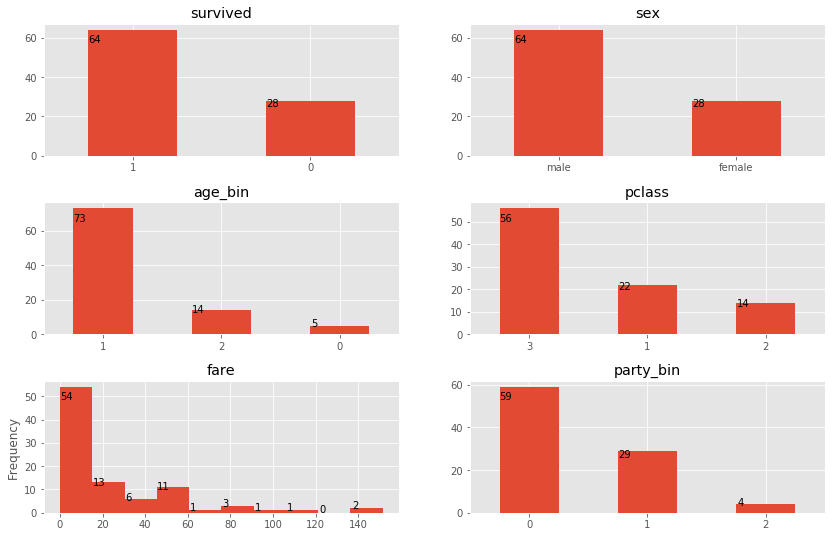

In [53]:
cols = [('bar','survived'),('bar','sex'),('bar','age_bin'),('bar','pclass'),('hist','fare'),('bar','party_bin')]
custom_subplots(df_luck,cols,3,10)

Meh. Those visuals are cool, but again, I think a pivot table is better for summarizing these 79 passengers that all of the models predicted incorrectly.

In [54]:
pd.pivot_table(df_luck, values='survived', columns='sex', index=['pclass','age_bin'],
               aggfunc=lambda x: "{:.1f}% ({} of {})".format 
               (np.mean(x)*100, np.count_nonzero(x), np.count_nonzero(x+1)))

sex                     female               male
pclass age_bin                                   
1      0         0.0% (0 of 1)                NaN
       1         0.0% (0 of 1)  100.0% (14 of 14)
       2         0.0% (0 of 1)    100.0% (5 of 5)
2      1         0.0% (0 of 4)    100.0% (6 of 6)
       2         0.0% (0 of 2)    100.0% (2 of 2)
3      0         0.0% (0 of 3)    100.0% (1 of 1)
       1        0.0% (0 of 14)  100.0% (34 of 34)
       2         0.0% (0 of 2)    100.0% (2 of 2)

# WHAT?!?!

This result is STUNNING. These are the passengers that all 6 of the models got wrong.  What do they all have in common? All of the survivors who 'got lucky' were male, and all of the victims who 'got unlucky' were female. In other words, THE main predictor for survival on the Titanic was actually sex! None of the 6 models could get it right when the other data didn't help, and it came down to a female dying or a male surviving. 

In [55]:
#NOTE: because there is variance in how the models predict (e.g. the randomness in Random Forests), I saved the results
#to a csv so I can load them again later if needed.

#Also, it was easier to go through the csv file and search for names on the web than it was from this notebook.

#df_luck.to_csv('df_luck.csv')

### Here are 4 of the passengers whose stories I found on the web that help illustrate the "luck" involved in their fate on that morning in 1912:

In [56]:
df_all[df_all.index.isin([22, 289, 313, 499])][['name','survived','sex','age','pclass','sibsp','parch',
                                                  'ticket','fare','cabin','embarked']]

,name,survived,sex,age,pclass,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,,
22,"Beesley, Mr. Lawrence",1,male,34.0,2,0,0,248698,13.00,D56,S
289,"Hosono, Mr. Masabumi",1,male,42.0,2,0,0,237798,13.00,NaN,S
313,"Lahtinen, Mrs. William (Anna Sylfven)",0,female,26.0,2,1,1,250651,26.00,NaN,S
499,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,female,25.0,1,1,2,113781,151.55,C22 C26,S


# Thank you for reading!

That's all for this focused notebook. I may publish some of my other experimental Titanic notebooks in this same Repository later.